In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('air1.csv')

In [167]:
df


,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,1653000.0,113.0,Boeing 737-300,733,130,100.0,101.0
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,1605400.0,109.0,Boeing 737-300,733,130,100.0,99.0
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1431000.0,97.0,Boeing 737-300,733,130,100.0,100.0
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,1556600.0,107.0,Boeing 737-300,733,130,100.0,99.0
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,1812800.0,124.0,Boeing 737-300,733,130,100.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,PG0480,AAQ,EGO,Belgorod,2017-01-02T09:25:00Z,2017-01-02T09:28:00Z,2017-01-02T10:15:00Z,2017-01-02T10:18:00Z,632400.0,82.0,Sukhoi Superjet-100,SU9,97,50.0,50.0
123,136937,PG0480,AAQ,EGO,Belgorod,2017-01-03T09:25:00Z,2017-01-03T09:29:00Z,2017-01-03T10:15:00Z,2017-01-03T10:19:00Z,626100.0,81.0,Sukhoi Superjet-100,SU9,97,50.0,50.0
124,136951,PG0480,AAQ,EGO,Belgorod,2017-02-02T09:25:00Z,2017-02-02T09:28:00Z,2017-02-02T10:15:00Z,2017-02-02T10:17:00Z,720600.0,90.0,Sukhoi Superjet-100,SU9,97,50.0,49.0
125,136953,PG0480,AAQ,EGO,Belgorod,2017-02-27T09:25:00Z,2017-02-27T09:27:00Z,2017-02-27T10:15:00Z,2017-02-27T10:17:00Z,765300.0,97.0,Sukhoi Superjet-100,SU9,97,50.0,50.0


In [168]:
df.aircraft_code.value_counts()

733    68
SU9    59
Name: aircraft_code, dtype: int64

In [169]:
df['fuel_cons'] = np.where(df.aircraft_code=='SU9', 1700/60 , 2600/60)


In [170]:
df.fuel_cons.value_counts()

43.333333    68
28.333333    59
Name: fuel_cons, dtype: int64

In [171]:
df['sum_fuel']=df.fact_flight_minutes*df.fuel_cons*37

In [172]:
df

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,1653000.0,113.0,Boeing 737-300,733,130,100.0,101.0,43.333333,161936.666667
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,1605400.0,109.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1431000.0,97.0,Boeing 737-300,733,130,100.0,100.0,43.333333,160333.333333
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,1556600.0,107.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,1812800.0,124.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,PG0480,AAQ,EGO,Belgorod,2017-01-02T09:25:00Z,2017-01-02T09:28:00Z,2017-01-02T10:15:00Z,2017-01-02T10:18:00Z,632400.0,82.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667
123,136937,PG0480,AAQ,EGO,Belgorod,2017-01-03T09:25:00Z,2017-01-03T09:29:00Z,2017-01-03T10:15:00Z,2017-01-03T10:19:00Z,626100.0,81.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667
124,136951,PG0480,AAQ,EGO,Belgorod,2017-02-02T09:25:00Z,2017-02-02T09:28:00Z,2017-02-02T10:15:00Z,2017-02-02T10:17:00Z,720600.0,90.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333
125,136953,PG0480,AAQ,EGO,Belgorod,2017-02-27T09:25:00Z,2017-02-27T09:27:00Z,2017-02-27T10:15:00Z,2017-02-27T10:17:00Z,765300.0,97.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667


In [173]:
df['fixed_costs'] = (((5*90000+420000+250000+200000)*1.3)/60/60)*df.fact_flight_minutes+400*df.sold*1.1+(30000+40000)/60*df.fact_flight_minutes
#5 бортпроводников, 60 часов в месяц налет. Средняя зарплата бортпроводника 80-100 тыс.руб. Командира 350-500 тыс.руб. Второго пилота 200-300 тыс.руб. Борт-инженера 200-300 тыс.руб.)
#Лизиннг всреднем 23000 в час, ТОиР 40000 в час, питание 400 р на место

In [174]:
df

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs
0,136119,PG0252,AAQ,SVO,Moscow,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,1653000.0,113.0,Boeing 737-300,733,130,100.0,101.0,43.333333,161936.666667,215696.666667
1,136120,PG0252,AAQ,SVO,Moscow,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,1605400.0,109.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,210650.000000
2,136122,PG0252,AAQ,SVO,Moscow,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1431000.0,97.0,Boeing 737-300,733,130,100.0,100.0,43.333333,160333.333333,207013.333333
3,136130,PG0252,AAQ,SVO,Moscow,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,1556600.0,107.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,209770.000000
4,136131,PG0252,AAQ,SVO,Moscow,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,1812800.0,124.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,217250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,136936,PG0480,AAQ,EGO,Belgorod,2017-01-02T09:25:00Z,2017-01-02T09:28:00Z,2017-01-02T10:15:00Z,2017-01-02T10:18:00Z,632400.0,82.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,118246.666667
123,136937,PG0480,AAQ,EGO,Belgorod,2017-01-03T09:25:00Z,2017-01-03T09:29:00Z,2017-01-03T10:15:00Z,2017-01-03T10:19:00Z,626100.0,81.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,117806.666667
124,136951,PG0480,AAQ,EGO,Belgorod,2017-02-02T09:25:00Z,2017-02-02T09:28:00Z,2017-02-02T10:15:00Z,2017-02-02T10:17:00Z,720600.0,90.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333,120123.333333
125,136953,PG0480,AAQ,EGO,Belgorod,2017-02-27T09:25:00Z,2017-02-27T09:27:00Z,2017-02-27T10:15:00Z,2017-02-27T10:17:00Z,765300.0,97.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,124846.666667


In [175]:
df['prof']=round(df['total_amount']-df['sum_fuel']-df['fixed_costs'],0)

In [176]:
df[df['prof'].isna()]

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs,prof
59,136511,PG0194,AAQ,NOZ,Novokuznetsk,2017-02-21T06:10:00Z,2017-02-21T06:15:00Z,2017-02-21T11:15:00Z,2017-02-21T11:25:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,310.0,43.333333,497033.333333,NaN,NaN
60,136513,PG0194,AAQ,NOZ,Novokuznetsk,2017-02-28T06:10:00Z,2017-02-28T06:13:00Z,2017-02-28T11:15:00Z,2017-02-28T11:23:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,310.0,43.333333,497033.333333,NaN,NaN
61,136514,PG0194,AAQ,NOZ,Novokuznetsk,2017-02-07T06:10:00Z,2017-02-07T06:14:00Z,2017-02-07T11:15:00Z,2017-02-07T11:13:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,299.0,43.333333,479396.666667,NaN,NaN
62,136523,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-10T06:10:00Z,2017-01-10T06:14:00Z,2017-01-10T11:15:00Z,2017-01-10T11:26:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,312.0,43.333333,500240.000000,NaN,NaN
63,136540,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-17T06:10:00Z,2017-01-17T06:14:00Z,2017-01-17T11:15:00Z,2017-01-17T11:21:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,307.0,43.333333,492223.333333,NaN,NaN
64,136544,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-31T06:10:00Z,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,2017-01-31T11:14:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,304.0,43.333333,487413.333333,NaN,NaN
65,136546,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-03T06:10:00Z,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,2017-01-03T11:15:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,302.0,43.333333,484206.666667,NaN,NaN
66,136560,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-24T06:10:00Z,2017-01-24T06:13:00Z,2017-01-24T11:15:00Z,2017-01-24T11:18:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,305.0,43.333333,489016.666667,NaN,NaN
67,136567,PG0194,AAQ,NOZ,Novokuznetsk,2017-02-14T06:10:00Z,2017-02-14T06:12:00Z,2017-02-14T11:15:00Z,2017-02-14T11:23:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,311.0,43.333333,498636.666667,NaN,NaN


In [177]:
df['sold_percent']=df['sold']/df['seats']

In [178]:
df.sort_values('prof')

,flight_id,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs,prof,sold_percent
102,136807,PG0480,AAQ,EGO,Belgorod,2017-02-23T09:25:00Z,2017-02-23T09:28:00Z,2017-02-23T10:15:00Z,2017-02-23T10:18:00Z,531000.0,68.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,112086.666667,366497.0,0.701031
77,136642,PG0480,AAQ,EGO,Belgorod,2017-01-30T09:25:00Z,2017-01-30T09:28:00Z,2017-01-30T10:15:00Z,2017-01-30T10:17:00Z,531000.0,64.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333,108683.333333,370948.0,0.659794
109,136844,PG0480,AAQ,EGO,Belgorod,2017-02-28T09:25:00Z,2017-02-28T09:26:00Z,2017-02-28T10:15:00Z,2017-02-28T10:16:00Z,575100.0,79.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,116926.666667,405757.0,0.814433
116,136887,PG0480,AAQ,EGO,Belgorod,2017-01-20T09:25:00Z,2017-01-20T09:30:00Z,2017-01-20T10:15:00Z,2017-01-20T10:19:00Z,595200.0,78.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333,114843.333333,428988.0,0.804124
120,136922,PG0480,AAQ,EGO,Belgorod,2017-02-11T09:25:00Z,2017-02-11T09:27:00Z,2017-02-11T10:15:00Z,2017-02-11T10:17:00Z,607800.0,76.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,115606.666667,439777.0,0.783505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,136540,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-17T06:10:00Z,2017-01-17T06:14:00Z,2017-01-17T11:15:00Z,2017-01-17T11:21:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,307.0,43.333333,492223.333333,NaN,NaN,NaN
64,136544,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-31T06:10:00Z,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,2017-01-31T11:14:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,304.0,43.333333,487413.333333,NaN,NaN,NaN
65,136546,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-03T06:10:00Z,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,2017-01-03T11:15:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,302.0,43.333333,484206.666667,NaN,NaN,NaN
66,136560,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-24T06:10:00Z,2017-01-24T06:13:00Z,2017-01-24T11:15:00Z,2017-01-24T11:18:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,305.0,43.333333,489016.666667,NaN,NaN,NaN


In [179]:
df.drop(['flight_id'], inplace=True, axis=1)

In [180]:
df.dropna()

,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs,prof,sold_percent
0,PG0252,AAQ,SVO,Moscow,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,2017-01-03T11:45:00Z,2017-01-03T11:49:00Z,1653000.0,113.0,Boeing 737-300,733,130,100.0,101.0,43.333333,161936.666667,215696.666667,1275367.0,0.869231
1,PG0252,AAQ,SVO,Moscow,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,2017-02-24T11:45:00Z,2017-02-24T11:46:00Z,1605400.0,109.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,210650.000000,1236020.0,0.838462
2,PG0252,AAQ,SVO,Moscow,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1431000.0,97.0,Boeing 737-300,733,130,100.0,100.0,43.333333,160333.333333,207013.333333,1063653.0,0.746154
3,PG0252,AAQ,SVO,Moscow,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,2017-02-13T11:45:00Z,2017-02-13T11:46:00Z,1556600.0,107.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,209770.000000,1188100.0,0.823077
4,PG0252,AAQ,SVO,Moscow,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,2017-01-28T11:45:00Z,2017-01-28T11:46:00Z,1812800.0,124.0,Boeing 737-300,733,130,100.0,99.0,43.333333,158730.000000,217250.000000,1436820.0,0.953846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,PG0480,AAQ,EGO,Belgorod,2017-01-02T09:25:00Z,2017-01-02T09:28:00Z,2017-01-02T10:15:00Z,2017-01-02T10:18:00Z,632400.0,82.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,118246.666667,461737.0,0.845361
123,PG0480,AAQ,EGO,Belgorod,2017-01-03T09:25:00Z,2017-01-03T09:29:00Z,2017-01-03T10:15:00Z,2017-01-03T10:19:00Z,626100.0,81.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,117806.666667,455877.0,0.835052
124,PG0480,AAQ,EGO,Belgorod,2017-02-02T09:25:00Z,2017-02-02T09:28:00Z,2017-02-02T10:15:00Z,2017-02-02T10:17:00Z,720600.0,90.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333,120123.333333,549108.0,0.927835
125,PG0480,AAQ,EGO,Belgorod,2017-02-27T09:25:00Z,2017-02-27T09:27:00Z,2017-02-27T10:15:00Z,2017-02-27T10:17:00Z,765300.0,97.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,124846.666667,588037.0,1.000000


In [186]:
df.sort_values('sold_percent')

,flight_no,departure_airport,arrival_airport,arrival_city,scheduled_departure,actual_departure,scheduled_arrival,actual_arrival,total_amount,sold,model,aircraft_code,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs,prof,sold_percent
77,PG0480,AAQ,EGO,Belgorod,2017-01-30T09:25:00Z,2017-01-30T09:28:00Z,2017-01-30T10:15:00Z,2017-01-30T10:17:00Z,531000.0,64.0,Sukhoi Superjet-100,SU9,97,50.0,49.0,28.333333,51368.333333,108683.333333,370948.0,0.659794
102,PG0480,AAQ,EGO,Belgorod,2017-02-23T09:25:00Z,2017-02-23T09:28:00Z,2017-02-23T10:15:00Z,2017-02-23T10:18:00Z,531000.0,68.0,Sukhoi Superjet-100,SU9,97,50.0,50.0,28.333333,52416.666667,112086.666667,366497.0,0.701031
2,PG0252,AAQ,SVO,Moscow,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,2017-01-08T11:45:00Z,2017-01-08T11:48:00Z,1431000.0,97.0,Boeing 737-300,733,130,100.0,100.0,43.333333,160333.333333,207013.333333,1063653.0,0.746154
38,PG0252,AAQ,SVO,Moscow,2017-02-05T10:05:00Z,2017-02-05T10:08:00Z,2017-02-05T11:45:00Z,2017-02-05T11:48:00Z,1455400.0,97.0,Boeing 737-300,733,130,100.0,100.0,43.333333,160333.333333,207013.333333,1088053.0,0.746154
21,PG0252,AAQ,SVO,Moscow,2017-02-08T10:05:00Z,2017-02-08T10:06:00Z,2017-02-08T11:45:00Z,2017-02-08T11:47:00Z,1407800.0,99.0,Boeing 737-300,733,130,100.0,101.0,43.333333,161936.666667,209536.666667,1036327.0,0.761538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-17T06:10:00Z,2017-01-17T06:14:00Z,2017-01-17T11:15:00Z,2017-01-17T11:21:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,307.0,43.333333,492223.333333,NaN,NaN,NaN
64,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-31T06:10:00Z,2017-01-31T06:10:00Z,2017-01-31T11:15:00Z,2017-01-31T11:14:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,304.0,43.333333,487413.333333,NaN,NaN,NaN
65,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-03T06:10:00Z,2017-01-03T06:13:00Z,2017-01-03T11:15:00Z,2017-01-03T11:15:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,302.0,43.333333,484206.666667,NaN,NaN,NaN
66,PG0194,AAQ,NOZ,Novokuznetsk,2017-01-24T06:10:00Z,2017-01-24T06:13:00Z,2017-01-24T11:15:00Z,2017-01-24T11:18:00Z,NaN,NaN,Boeing 737-300,733,130,305.0,305.0,43.333333,489016.666667,NaN,NaN,NaN


In [183]:
df.corr()

,total_amount,sold,seats,plan_flight_minutes,fact_flight_minutes,fuel_cons,sum_fuel,fixed_costs,prof,sold_percent
total_amount,1.000000,0.907523,0.976290,0.976290,0.974231,0.976290,0.974836,0.988061,0.998751,-0.177192
sold,0.907523,1.000000,0.805490,0.805490,0.802897,0.805490,0.803332,0.848561,0.923746,0.250458
seats,0.976290,0.805490,1.000000,0.603453,0.599836,1.000000,0.676350,0.996573,0.964396,-0.366368
plan_flight_minutes,0.976290,0.805490,0.603453,1.000000,0.999760,0.603453,0.995294,0.996573,0.964396,-0.366368
fact_flight_minutes,0.974231,0.802897,0.599836,0.999760,1.000000,0.599836,0.995051,0.996712,0.961767,-0.368407
fuel_cons,0.976290,0.805490,1.000000,0.603453,0.599836,1.000000,0.676350,0.996573,0.964396,-0.366368
sum_fuel,0.974836,0.803332,0.676350,0.995294,0.995051,0.676350,1.000000,0.996708,0.962518,-0.368593
fixed_costs,0.988061,0.848561,0.996573,0.996573,0.996712,0.996573,0.996708,1.000000,0.979204,-0.292943
prof,0.998751,0.923746,0.964396,0.964396,0.961767,0.964396,0.962518,0.979204,1.000000,-0.134942
sold_percent,-0.177192,0.250458,-0.366368,-0.366368,-0.368407,-0.366368,-0.368593,-0.292943,-0.134942,1.000000


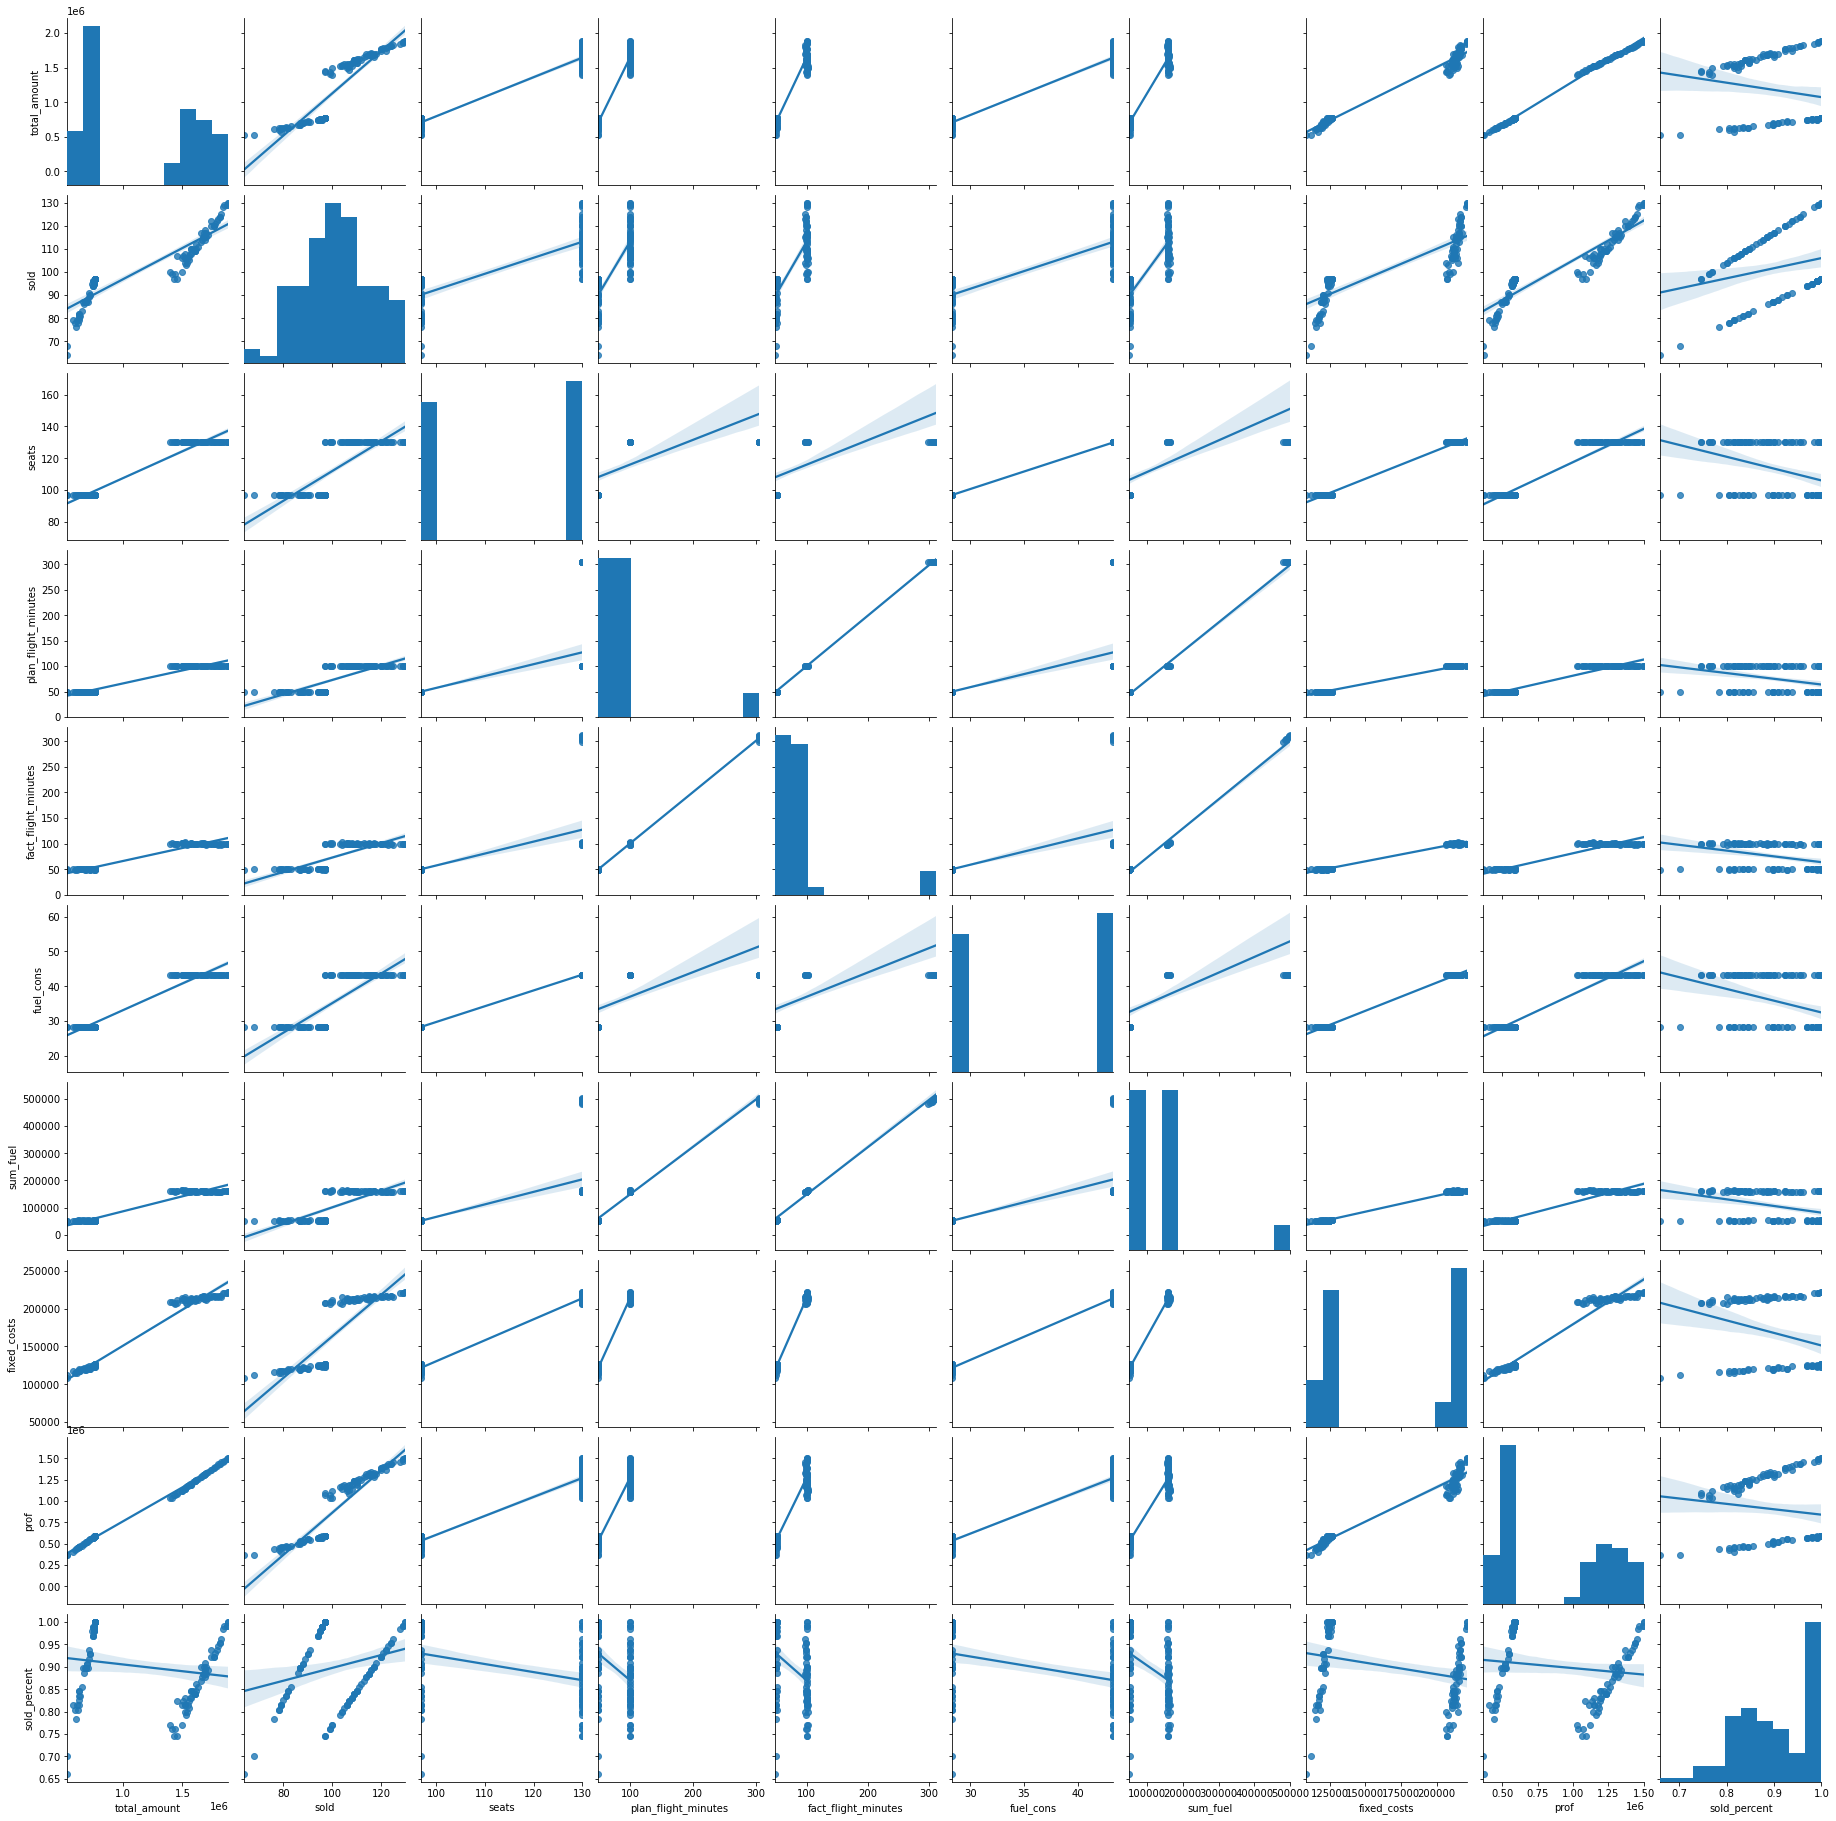

In [187]:
sns.pairplot(df, kind = 'reg')
